<a href="https://colab.research.google.com/github/MSaber7/DL/blob/master/DNNImageDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratory work №5. Deep neural netwoks for image detection


> The task is to build the deep neural network for pollen images detection. There is 11 classes of anonymized objects to detect and recognize.

1. Take the implementation of RetinaNet https://github.com/fizyr/keras-retinanet or write your own or choose any other famous neural network for image detection.
2. [If you took the suggested implementation, follow the instructions for installing and training on custom dataset in Readme. Set batchsize to 2.] Train your NN on pollen dataset.
3. Visualize the result of trained NN [using inference example https://github.com/fizyr/keras-retinanet/blob/master/examples/ResNet50RetinaNet.ipynb. Evaluate your model using evaluate.py script.]
4. Labels could be found in bboxes.csv file, class mapping in class_map.csv, the dataset images in /ds11 folder. The labels format is:
ds11/image_id.png, y1,x1,y2,x2
5. data_shape = 180*250

## Setup Setting

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#'drive/My Drive/Colab Notebooks/Data/keras-retinanet-master/
%cd/content/drive/My Drive/Colab Notebooks/Data/keras-retinanet-master/keras-retinanet-master

/content/drive/My Drive/Colab Notebooks/Data/keras-retinanet-master/keras-retinanet-master


In [4]:
!python setup.py build_ext --inplace

running build_ext
skipping 'keras_retinanet/utils/compute_overlap.c' Cython extension (up-to-date)
copying build/lib.linux-x86_64-3.6/keras_retinanet/utils/compute_overlap.cpython-36m-x86_64-linux-gnu.so -> keras_retinanet/utils


In [5]:
%cd/content/drive/My Drive/Colab Notebooks/Data/keras-retinanet-master/keras-retinanet-master/keras_retinanet/bin/

/content/drive/My Drive/Colab Notebooks/Data/keras-retinanet-master/keras-retinanet-master/keras_retinanet/bin


In [6]:
!pip install keras_resnet

In [7]:
!pip install Keras==2.3.0

## Training Model

In [0]:
# Split data to train and test

## import pandas as pd
## data = pd.read_csv('bboxes_retinanet.csv', header=None)
## data = data.sample(frac=1).reset_index(drop=True)

## amount_80 = int(0.8*len(data))
## train_data = data[:amount_80]
## test_data = data[amount_80:]



In [8]:
!python ./train.py --epochs 10 --steps 1500 --batch-size 2 csv 'train.csv' 'class_map.csv' --val-annotations 'test.csv'

Using TensorFlow backend.
102948864/102945312 [==============================] - 3s 0us/step
Creating model, this may take a second...
Instructions for updating:
If using Keras pass *_constraint arguments to layers.

2020-01-16 20:59:09.314307: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-01-16 20:59:09.346262: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-01-16 20:59:09.346847: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla T4 major: 7 minor: 5 memoryClockRate(GHz): 1.59
pciBusID: 0000:00:04.0
2020-01-16 20:59:09.347177: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-01-16 20:59:09.357435: I tensorflow/stream_executor/platform/default/d

## Install and Convert Model to Inference

In [34]:
!pip install git+http://github.com/fizyr/keras-retinanet.git

  Cloning http://github.com/fizyr/keras-retinanet.git to /tmp/pip-req-build-uxgf0nmy
  Running command git clone -q http://github.com/fizyr/keras-retinanet.git /tmp/pip-req-build-uxgf0nmy
  Running command git submodule update --init --recursive -q
  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp36-cp36m-linux_x86_64.whl size=169842 sha256=300b94bcba0d197bbe529501a585d5d2d6dd841007184b6b8fd6b61ca6ea6fad
  Stored in directory: /tmp/pip-ephem-wheel-cache-7nqj2oie/wheels/b3/9a/6a/8c298f0a5fa5cbbf0b9483b5d1b4c926539871080bf4e7aee8
Successfully built keras-retinanet


In [48]:
%cd/content/drive/My Drive/Colab Notebooks/Data/keras-retinanet-master/keras-retinanet-master/keras_retinanet/bin/

/content/drive/My Drive/Colab Notebooks/Data/keras-retinanet-master/keras-retinanet-master/keras_retinanet/bin


In [50]:
!python ./convert_model.py 'snapshots/resnet50_csv_10.h5' 'Inference/resnet50_csv_10.h5'

Using TensorFlow backend.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.

2020-01-17 00:25:56.872505: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-01-17 00:25:56.877318: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-01-17 00:25:56.877365: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: 435fa66810d6
2020-01-17 00:25:56.877382: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: 435fa66810d6
2020-01-17 00:25:56.877452: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 418.67.0
2020-01-17 00:25:56.877489: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 418.67.0
2020-01-17 00:25:56.877506: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc

## Library

In [0]:
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

gpu = 0 # use this to change which GPU to use

setup_gpu(gpu) # set the modified tf session as backend in keras

In [12]:
%cd/content/drive/My Drive/Colab Notebooks/Data/keras-retinanet-master/keras-retinanet-master/keras_retinanet/bin/

/content/drive/My Drive/Colab Notebooks/Data/keras-retinanet-master/keras-retinanet-master/keras_retinanet/bin


In [56]:
%cd/content/drive/My Drive/Colab Notebooks/Data/keras-retinanet-master/keras-retinanet-master/keras_retinanet/bin/Inference/

/content/drive/My Drive/Colab Notebooks/Data/keras-retinanet-master/keras-retinanet-master/keras_retinanet/bin/Inference


In [57]:

model_path = '/content/drive/My Drive/Colab Notebooks/Data/keras-retinanet-master/keras-retinanet-master/keras_retinanet/bin/Inference/resnet50_csv_10.h5'
model = models.load_model(model_path, backbone_name='resnet50')
labels_to_names = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: '10'}


tracking <tf.Variable 'Variable_15:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_16:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_17:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_18:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_19:0' shape=(9, 4) dtype=float32> anchors


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


## Visualization to image detection

In [0]:
def VisualImg (image):
  draw = image.copy()
  draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

  # preprocess image for network
  image = preprocess_image(image)
  image, scale = resize_image(image)

  # process image
  start = time.time()
  # result = model.predict_on_batch(np.expand_dims(image, axis=0))
  boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
  print("processing time: ", time.time() - start)

  # correct for image scale
  boxes /= scale

  # visualize detections
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
  # for box, label in zip(boxes[0], labels[0]):
      # scores are sorted so we can break
      if score < 0.5:
          break
          
      color = label_color(label)
      
      b = box.astype(int)
      draw_box(draw, b, color=color)
      
      caption = "{} {:.3f}".format(labels_to_names[label], score)
      draw_caption(draw, b, caption)
      
  plt.figure(figsize=(15, 15))
  plt.axis('off')
  plt.imshow(draw)
  plt.show()

In [112]:
%cd/content/drive/My Drive/Colab Notebooks/Data/keras-retinanet-master/keras-retinanet-master/keras_retinanet/bin/ds11/

/content/drive/My Drive/Colab Notebooks/Data/keras-retinanet-master/keras-retinanet-master/keras_retinanet/bin/ds11


In [0]:
PathImg = '/content/drive/My Drive/Colab Notebooks/Data/keras-retinanet-master/keras-retinanet-master/keras_retinanet/bin/ds11/'

### Class 0

processing time:  0.16696977615356445


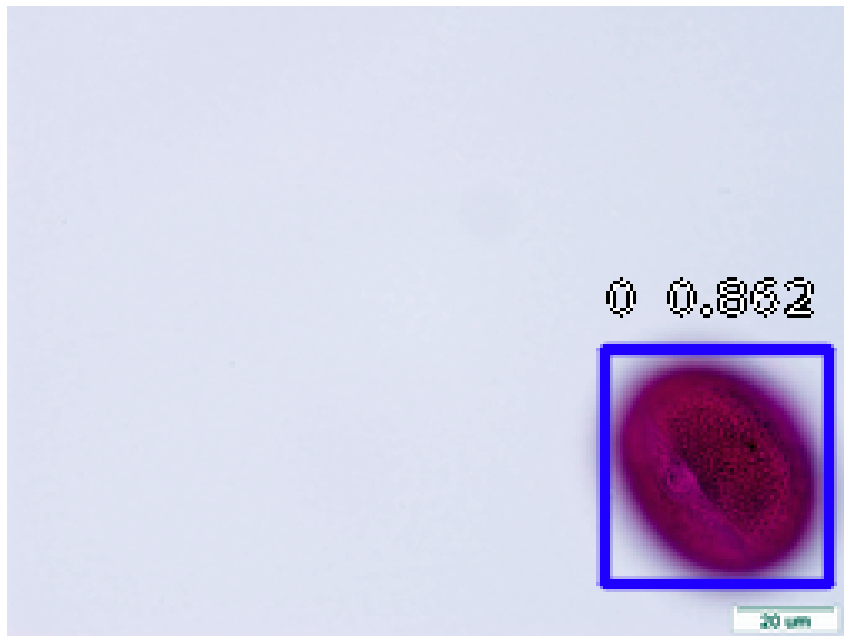

In [116]:
image = read_image_bgr(PathImg + '1.png') 
VisualImg(image)

### Class 1 

processing time:  0.1604466438293457


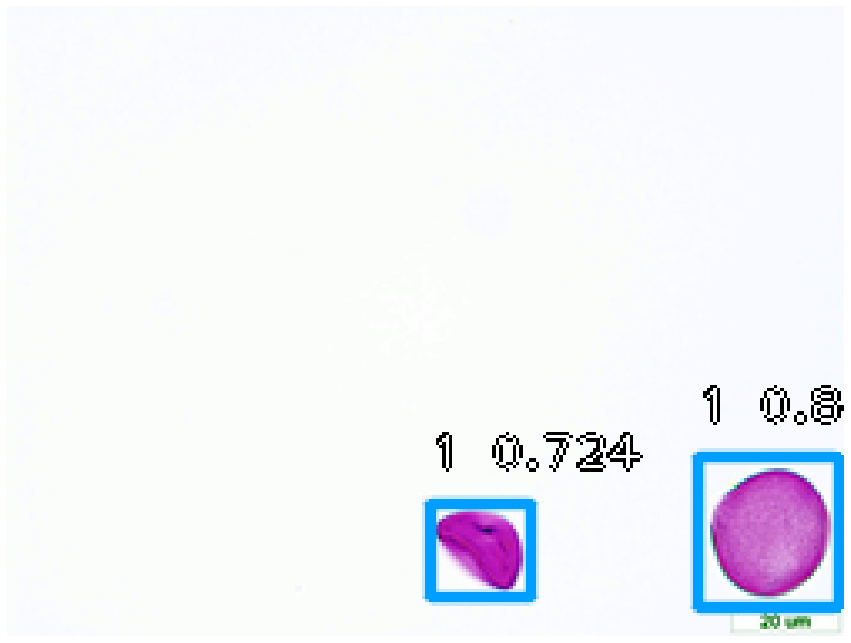

In [113]:
image = read_image_bgr(PathImg + '190.png') 
VisualImg(image)

### Class 2

processing time:  0.15967798233032227


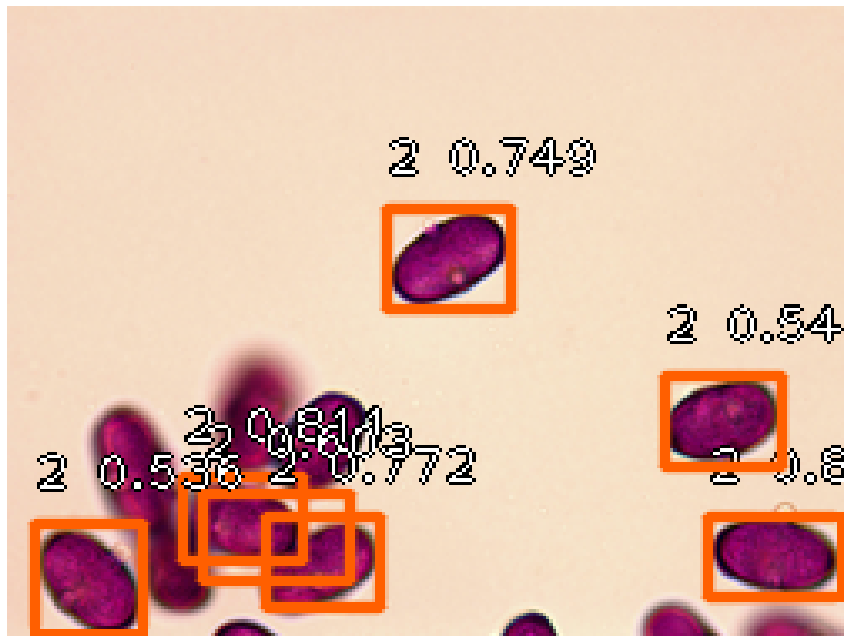

In [114]:
image = read_image_bgr(PathImg + '945.png') 
VisualImg(image)

### Class 3

processing time:  0.15046000480651855


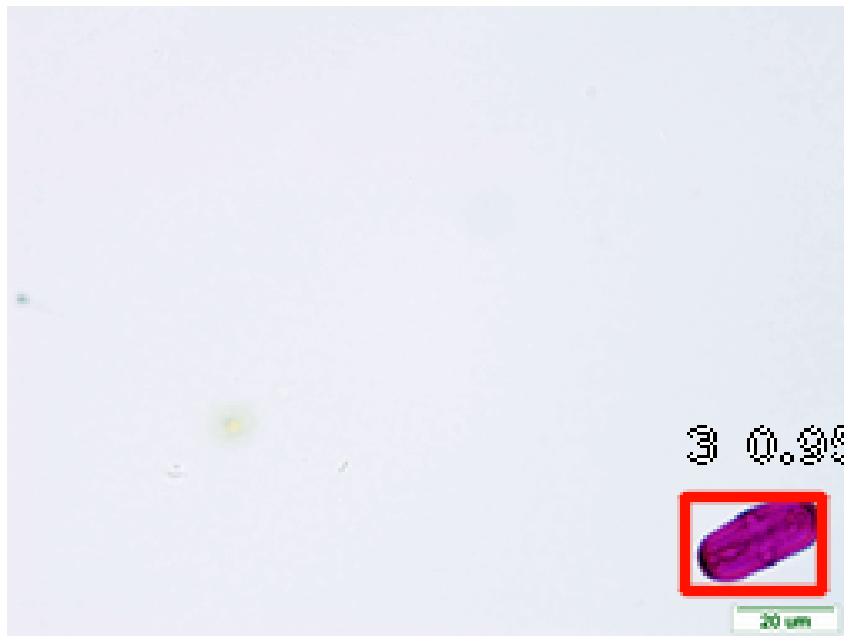

In [115]:
image = read_image_bgr(PathImg + '289.png') 
VisualImg(image)

### Class 4

processing time:  0.16150140762329102


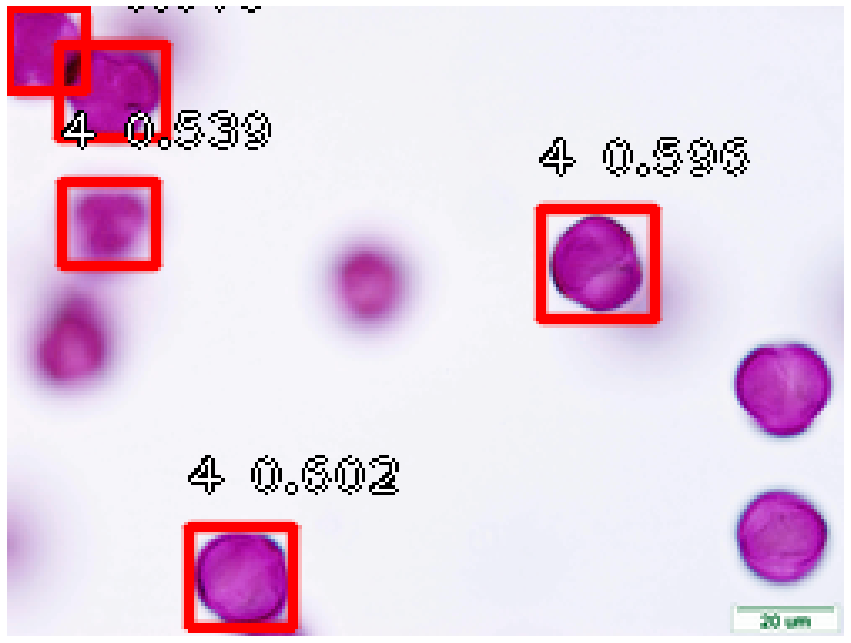

In [122]:
image = read_image_bgr(PathImg + '342.png') # class 4
VisualImg(image)

### Class 5

processing time:  0.16407465934753418


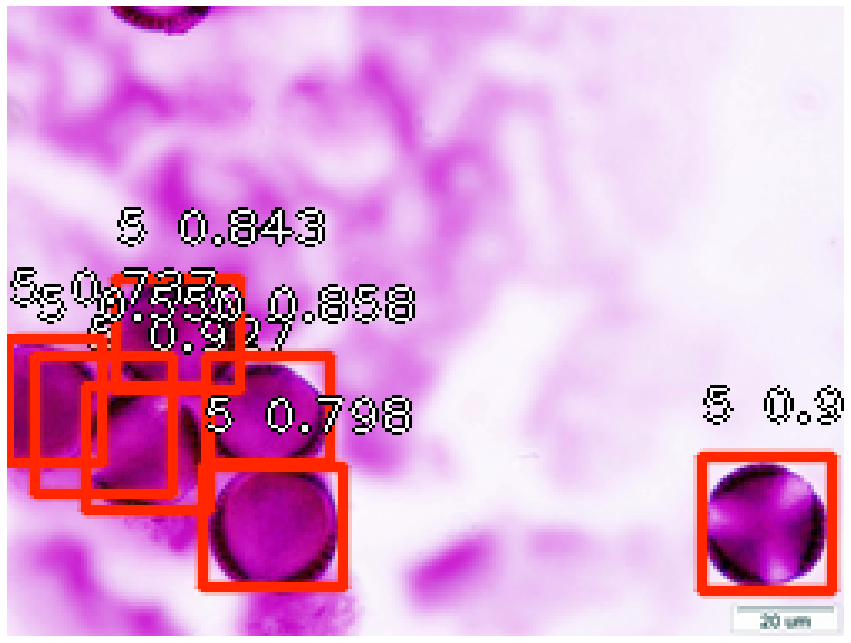

In [123]:
image = read_image_bgr(PathImg + '438.png') # class 5
VisualImg(image)

### Class 6

processing time:  0.15358591079711914


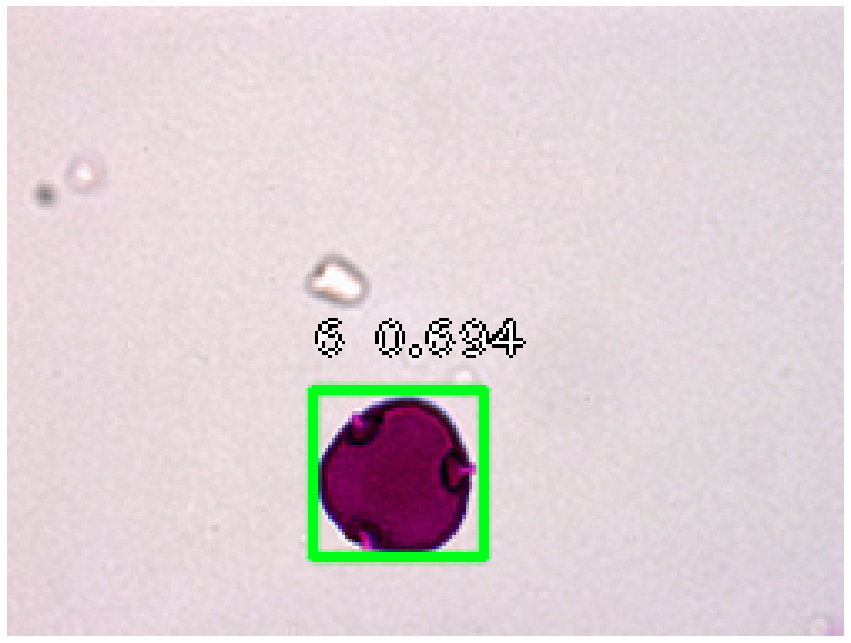

In [124]:
image = read_image_bgr(PathImg + '527.png')
VisualImg(image)

### Class 7

processing time:  0.16213202476501465


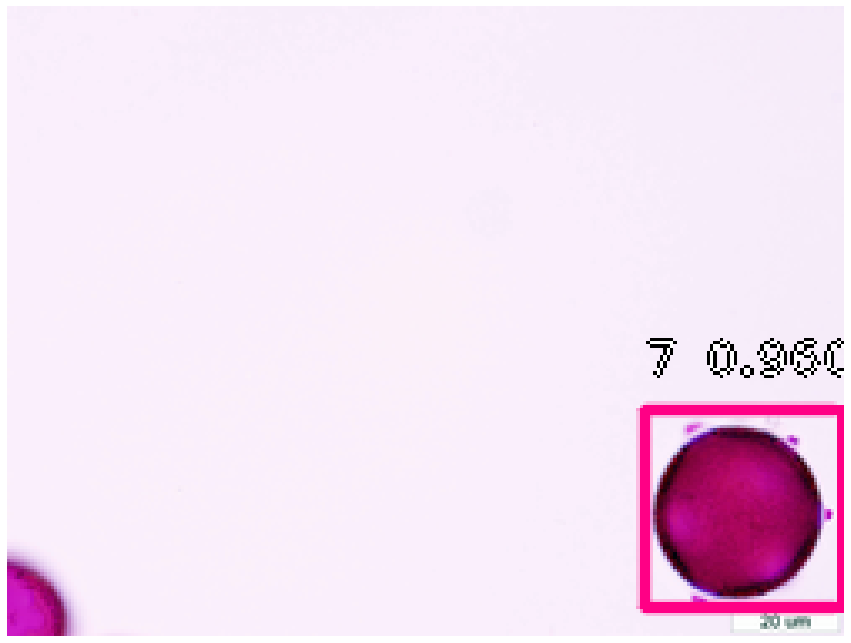

In [125]:
image = read_image_bgr(PathImg + '629.png') # class 7
VisualImg(image)

### Class 8

processing time:  0.15215849876403809


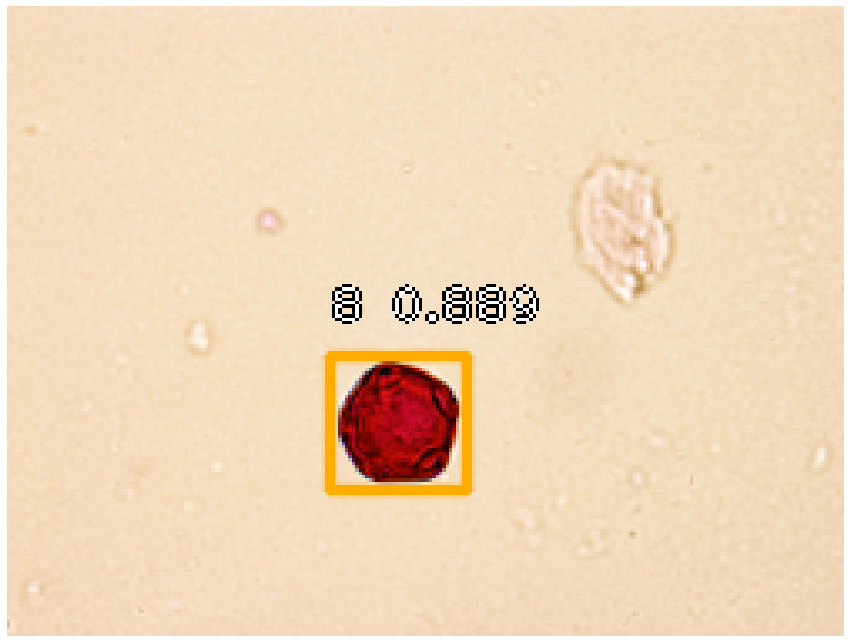

In [126]:
image = read_image_bgr(PathImg + '682.png')
VisualImg(image)

### Class 9

processing time:  0.16234946250915527


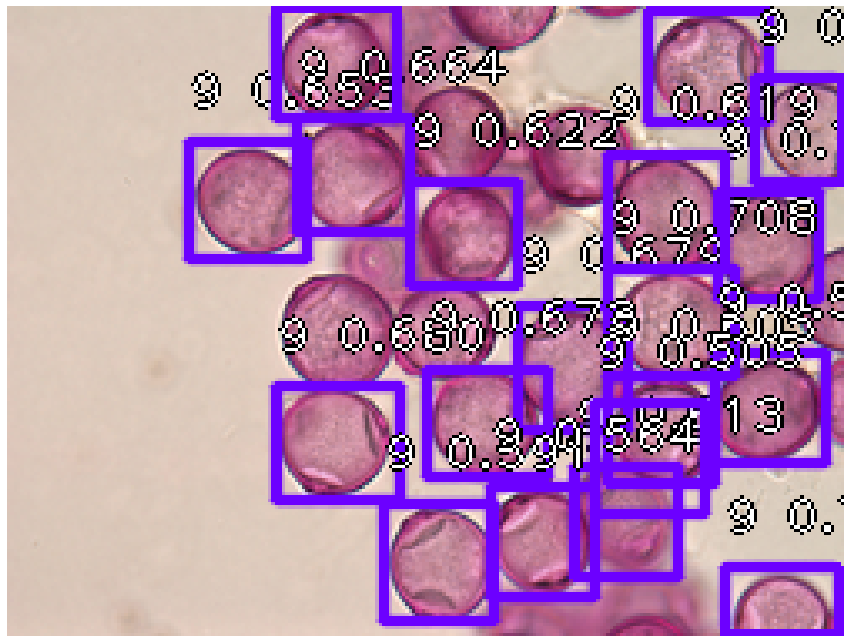

In [128]:
image = read_image_bgr(PathImg + '777.png') # class 9
VisualImg(image)

### Class 10

processing time:  0.15229225158691406


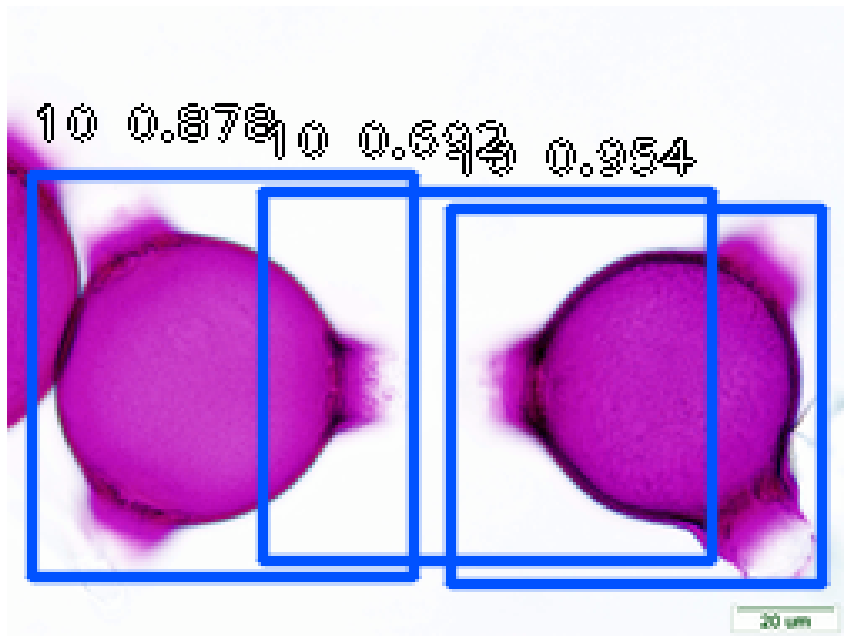

In [127]:
image = read_image_bgr(PathImg + '900.png') # class 10
VisualImg(image)